Continuing with the previous machine learning problem, let's get back to the pre-processed dataset Suicide Rates OVerview 1985 to 2016 file. We would like to have a machine learning model predict the suicide rate 'suicides/100k pop'.

**Question 1**: Use your previous pre-processed dataset, keep the variables as one-hot-encoded and develop a multiple linear regression model. How many regression coefficients does this model have?

In [644]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('master.csv')

# To make sure it's the correct dataset
print(f'Number of rows={len(df)}, Number of columns={len(df.columns)}')

df.head()



Number of rows=27820, Number of columns=12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [645]:
# Change GDP for year to a numerical variable
df2=df.copy()
df2[' gdp_for_year ($) '] = df2[' gdp_for_year ($) '].str.replace(',', '').astype(int)

numerical_df = df2.select_dtypes(include='number')

numerical_df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.025240,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,0.305193,1.000000,0.303405
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,0.303405,1.000000



Based on assignment 3, the preprocessed models had the following variables kept, while the rest were dropped. This was done based on a correlation analysis on the numerical variables and examining visualizations of bar plots againt the count of each nominal category.

*   Sex
*   Age Group
*   Generation
*   GDP for Year

The rest of the pre-processing invovles removing outliers, checking for missing values, and NaNs and imputing them accordingly


Next, Question 1 asks us to one hot encode the nominal variables for our multiple regression model







In [646]:
# Drop the unwanted variables and only keep the wanted ones

selected_columns=['sex','age',' gdp_for_year ($) ','generation','suicides/100k pop']
X=df2[selected_columns]

X.head()

,sex,age,gdp_for_year ($),generation,suicides/100k pop
0,male,15-24 years,2156624900,Generation X,6.71
1,male,35-54 years,2156624900,Silent,5.19
2,female,15-24 years,2156624900,Generation X,4.83
3,male,75+ years,2156624900,G.I. Generation,4.59
4,male,25-34 years,2156624900,Boomers,3.28


In [647]:
# Check for Duplicates

X1=X.copy()
X1["is_duplicate"]= X1.duplicated()

print(f"#total= {len(X1)}")
print(f"#duplicated= {len(X1[X1['is_duplicate']==True])}")






#total= 27820
#duplicated= 0


No Duplicates in Data

In [648]:
X[' gdp_for_year ($) ']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

In [649]:
# Do we have NaN in our dataset?
X.isnull().any()

sex                   False
age                   False
 gdp_for_year ($)     False
generation            False
suicides/100k pop     False
dtype: bool

No missing values

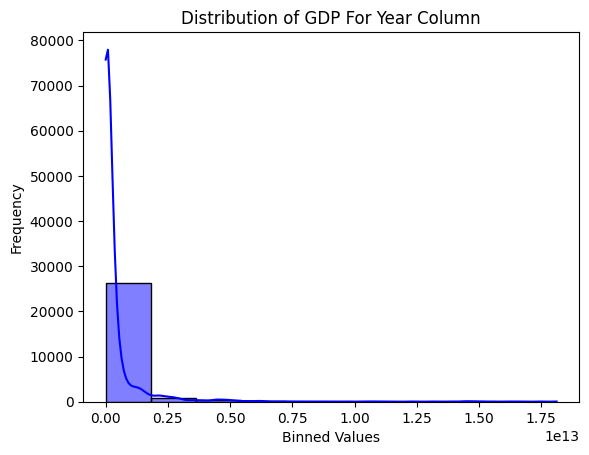

In [650]:
# Check for Numerical Outliers

# Distribution of 'suicide rate/100k pop' variable
import seaborn as sns
from scipy.stats import gaussian_kde



sns.histplot(X[' gdp_for_year ($) '], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of GDP For Year Column')
plt.xlabel('Binned Values')
plt.ylabel('Frequency')

plt.show()


We can get rid of the GDP For Year value greater than 0.50 *1e13, since they occur at a very low frequency

In [651]:
indices_greater = X[X[' gdp_for_year ($) '] > 10000000000000].index

X_dropped=X.drop(indices_greater)

print(len(X))
print(len(X_dropped))


27820
27628


In [652]:
X_dropped = X_dropped.reset_index(drop=True)


In [653]:
from os import X_OK
# One hot encode Nominal Variables

X_onehot=X_dropped.copy()

def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix=_f, prefix_sep=' - ', dtype=int)
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

X_onehot=encode_onehot(X_onehot,'sex')
X_onehot=encode_onehot(X_onehot,'age')
X_onehot=encode_onehot(X_onehot,'generation')

print(X_onehot.columns)
X2=X_onehot.copy()

Index([' gdp_for_year ($) ', 'suicides/100k pop', 'sex - female', 'sex - male',
       'age - 15-24 years', 'age - 25-34 years', 'age - 35-54 years',
       'age - 5-14 years', 'age - 55-74 years', 'age - 75+ years',
       'generation - Boomers', 'generation - G.I. Generation',
       'generation - Generation X', 'generation - Generation Z',
       'generation - Millenials', 'generation - Silent'],
      dtype='object')


In [654]:
y_onehot=X_onehot['suicides/100k pop']
X_onehot=X_onehot.drop('suicides/100k pop',axis=1)
X_onehot.columns

Index([' gdp_for_year ($) ', 'sex - female', 'sex - male', 'age - 15-24 years',
       'age - 25-34 years', 'age - 35-54 years', 'age - 5-14 years',
       'age - 55-74 years', 'age - 75+ years', 'generation - Boomers',
       'generation - G.I. Generation', 'generation - Generation X',
       'generation - Generation Z', 'generation - Millenials',
       'generation - Silent'],
      dtype='object')

In [655]:
print(len(X_onehot))

len(y_onehot)

27628


27628

In [656]:
# Multiple Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_onehot,y_onehot)


LinearRegression()

In [657]:
# Check number of coefficients in the model

cf=model.coef_
print('Number of Coefficients:')

for i in range(len(cf)):
  print(cf[i])
print(len(cf))

Number of Coefficients:
8.564139877676748e-13
-7.4167739250036195
7.41677392500362
-2.7755148176296323
-0.17334691384187673
1.8906869497594103
-10.777117814968348
2.4857230134212536
9.349569583259195
0.29974827081031374
3.2884940649129057
-0.6151144847100181
-1.6062302451595025
-1.7217974128345475
0.35489980698085266
15


In [658]:
for i in reversed(np.argsort(np.abs(cf))):
    print(f'{np.abs(cf[i]):.3f}    {X_onehot.columns[i]}')

10.777    age - 5-14 years
9.350    age - 75+ years
7.417    sex - male
7.417    sex - female
3.288    generation - G.I. Generation
2.776    age - 15-24 years
2.486    age - 55-74 years
1.891    age - 35-54 years
1.722    generation - Millenials
1.606    generation - Generation Z
0.615    generation - Generation X
0.355    generation - Silent
0.300    generation - Boomers
0.173    age - 25-34 years
0.000     gdp_for_year ($) 


In [659]:
# Sanity Check
print(len(X_onehot.columns))

15


There are 15 regression coefficients corresponding to our 15 columns in our dataframe

**Question 2**: Use this model to predict the target variable for people with age 20, and generation X. Report this prediction. What is the MAE of this prediction?

In [660]:
#filtered_rows = df[(df['col1'] == 'A') & (df['col2'] > 35) & (df['col3'] == False)]

filtX1=X2[(X2['age - 15-24 years']==1) & (X2['generation - Generation X']==1)& (X2['sex - male']==1)]

filtX1

,gdp_for_year ($),suicides/100k pop,sex - female,sex - male,age - 15-24 years,age - 25-34 years,age - 35-54 years,age - 5-14 years,age - 55-74 years,age - 75+ years,generation - Boomers,generation - G.I. Generation,generation - Generation X,generation - Generation Z,generation - Millenials,generation - Silent
0,2156624900,6.71,0,1,1,0,0,0,0,0,0,0,1,0,0,0
13,2126000000,5.33,0,1,1,0,0,0,0,0,0,0,1,0,0,0
28,2335124988,3.71,0,1,1,0,0,0,0,0,0,0,1,0,0,0
37,709452584,3.41,0,1,1,0,0,0,0,0,0,0,1,0,0,0
48,1228071038,7.40,0,1,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27440,13948892216,11.43,0,1,1,0,0,0,0,0,0,0,1,0,0,0
27452,14744603774,12.19,0,1,1,0,0,0,0,0,0,0,1,0,0,0
27464,14988971211,11.39,0,1,1,0,0,0,0,0,0,0,1,0,0,0
27475,17078465982,13.63,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [661]:
y_filt=filtX1['suicides/100k pop']
filtX11=filtX1.drop('suicides/100k pop',axis=1)

filtX11.columns

Index([' gdp_for_year ($) ', 'sex - female', 'sex - male', 'age - 15-24 years',
       'age - 25-34 years', 'age - 35-54 years', 'age - 5-14 years',
       'age - 55-74 years', 'age - 75+ years', 'generation - Boomers',
       'generation - G.I. Generation', 'generation - Generation X',
       'generation - Generation Z', 'generation - Millenials',
       'generation - Silent'],
      dtype='object')

In [662]:
# Sanity Check

print(len(filtX11))
print(len(y_filt))

1056
1056


In [663]:
from sklearn.metrics import mean_absolute_error

y_pred1=model.predict(filtX11)
# Model Evaluation
print('mean_absolute_error : ', mean_absolute_error(y_filt, y_pred1))


mean_absolute_error :  9.469327983808586


**Question 3**: Now go back to the original sex, age, generation variables in their original numerical form (prior to one hot encodign) and build a new model. Feature engineer the original nominal age and generation features in truly numerical features. How many line coefficients are there?

In [664]:
X_dropped

,sex,age,gdp_for_year ($),generation,suicides/100k pop
0,male,15-24 years,2156624900,Generation X,6.71
1,male,35-54 years,2156624900,Silent,5.19
2,female,15-24 years,2156624900,Generation X,4.83
3,male,75+ years,2156624900,G.I. Generation,4.59
4,male,25-34 years,2156624900,Boomers,3.28
...,...,...,...,...,...
27623,female,35-54 years,63067077179,Generation X,2.96
27624,female,75+ years,63067077179,Silent,2.58
27625,male,5-14 years,63067077179,Generation Z,2.17
27626,female,5-14 years,63067077179,Generation Z,1.67


In [665]:
X_num=X_dropped.copy()

print(X_num['age'].unique())
X_num['generation'].unique()


['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [666]:
mapping={'5-14 years':9.5,'15-24 years':19.5,'25-34 years' :29.5,'35-54 years':44.5,'55-74 years':64.5,'75+ years': 80.0 }
X_num['age']=X_num['age'].replace(mapping)

In [667]:
mapping={'Generation Z':1,'Millenials':2,'Generation X' :3,'Silent':4,'Boomers':5,'G.I. Generation': 6 }
X_num['generation']=X_num['generation'].replace(mapping)

X_num


,sex,age,gdp_for_year ($),generation,suicides/100k pop
0,male,19.5,2156624900,3,6.71
1,male,44.5,2156624900,4,5.19
2,female,19.5,2156624900,3,4.83
3,male,80.0,2156624900,6,4.59
4,male,29.5,2156624900,5,3.28
...,...,...,...,...,...
27623,female,44.5,63067077179,3,2.96
27624,female,80.0,63067077179,4,2.58
27625,male,9.5,63067077179,1,2.17
27626,female,9.5,63067077179,1,1.67


In [668]:
# Sanity check

X_num['generation'].unique()

array([3, 4, 6, 5, 2, 1])

In [669]:
X_num['age'].unique()

array([19.5, 44.5, 80. , 29.5, 64.5,  9.5])

In [670]:
def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix=_f, prefix_sep=' - ', dtype=int)
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

X_num=encode_onehot(X_num,'sex')

y_num=X_num['suicides/100k pop']
X3=X_num.copy()
X4=X_num.copy()

X_num=X_num.drop('suicides/100k pop',axis=1)

# Sanity Check
print(len(X_num))
print(len(y_num))

27628
27628


In [671]:
model=LinearRegression()
model.fit(X_num,y_num)

# Check number of coefficients in the model

cf=model.coef_
print('Number of Coefficients:')

for i in range(len(cf)):
  print(cf[i])
print(len(cf))


Number of Coefficients:
0.2161448988091372
9.082368250113212e-13
1.2782974342098705
-7.416773925003623
7.416773925003624
5


In [672]:
for i in reversed(np.argsort(np.abs(cf))):
    print(f'{np.abs(cf[i]):.3f}    {X_num.columns[i]}')

7.417    sex - male
7.417    sex - female
1.278    generation
0.216    age
0.000     gdp_for_year ($) 


In [673]:
# Sanity Check

print(len(X_num.columns))

5


There are 5 line coefficients corresponding to the 5 features independent features we have in our datarame

**Question 4**: Use this new Q3 model to predict the target value for the people with age 20, male, and generation X. Report the prediciton. What is the MAE of this prediction?

In [674]:
filtX2=X3[(X3['age']==19.5) & (X3['generation']==3)& (X3['sex - male']==1)]

filtX2

,age,gdp_for_year ($),generation,suicides/100k pop,sex - female,sex - male
0,19.5,2156624900,3,6.71,0,1
13,19.5,2126000000,3,5.33,0,1
28,19.5,2335124988,3,3.71,0,1
37,19.5,709452584,3,3.41,0,1
48,19.5,1228071038,3,7.40,0,1
...,...,...,...,...,...,...
27440,19.5,13948892216,3,11.43,0,1
27452,19.5,14744603774,3,12.19,0,1
27464,19.5,14988971211,3,11.39,0,1
27475,19.5,17078465982,3,13.63,0,1


In [675]:
y_filt2=filtX2['suicides/100k pop']
filtX2=filtX2.drop('suicides/100k pop',axis=1)

# Sanity Check
print(len(y_filt2))
print(len(filtX2))

1056
1056


In [676]:
filtX2

,age,gdp_for_year ($),generation,sex - female,sex - male
0,19.5,2156624900,3,0,1
13,19.5,2126000000,3,0,1
28,19.5,2335124988,3,0,1
37,19.5,709452584,3,0,1
48,19.5,1228071038,3,0,1
...,...,...,...,...,...
27440,19.5,13948892216,3,0,1
27452,19.5,14744603774,3,0,1
27464,19.5,14988971211,3,0,1
27475,19.5,17078465982,3,0,1


In [677]:
X_num

,age,gdp_for_year ($),generation,sex - female,sex - male
0,19.5,2156624900,3,0,1
1,44.5,2156624900,4,0,1
2,19.5,2156624900,3,1,0
3,80.0,2156624900,6,0,1
4,29.5,2156624900,5,0,1
...,...,...,...,...,...
27623,44.5,63067077179,3,1,0
27624,80.0,63067077179,4,1,0
27625,9.5,63067077179,1,0,1
27626,9.5,63067077179,1,1,0


In [678]:
from sklearn.metrics import mean_absolute_error

y_pred2=model.predict(filtX2)
# Model Evaluation
print('mean_absolute_error : ', mean_absolute_error(y_filt2, y_pred2))


mean_absolute_error :  8.790508158608988


**Question 5**: Did you note any change in these two model performances?

Yes, there was a slight change in performance. When converting the nominal variables from using one hot encoding to numerically related variables, the mean squared error decreased from 9.49 to 8.79. This is most likely due to the fact the age and generation have built in numerical relationships. For this reason, the age variable was changed to be the mean of the age bracket and the generation went from 1 to 6, where 1, gen Z, represented the youngest, and 6, GI generaiton represented the oldest. By utilizing the natural ordering of a nominal variable, we can leverage a natural increase in correlation between the dependent variable and the independent variable in one of the coefficients, and therefore lead to a lesser difference between predicted and actual outcome. This is seen in the coefficients of the age and generation variable, which changed from between 0.3 and 1.722 and 1.89-3.288 to 1.278 and 0.216 respectively. Changing the coefficient of the variable changes the weighted sum, contributing to the lesser residual.

**Question 6**: Use your Q3 model to predict predict target value for age 33, male, and generation alpha (after gen Z = Millenial). Report the prediction

Since categorically there is no generation Alpha as part of the 'generation' variable, I will use the generation after gen Z, which is millenials. Generation alpha is technically younger than gen Z, but there is no age group taht corresponds to them either. When I report my prediciton I am including males, generation class of 0, who are 29.5 (mean of the group)

In [679]:
X4.iloc[0]

age                   1.950000e+01
 gdp_for_year ($)     2.156625e+09
generation            3.000000e+00
suicides/100k pop     6.710000e+00
sex - female          0.000000e+00
sex - male            1.000000e+00
Name: 0, dtype: float64

In [680]:
new_row={'age':33,' gdp_for_year ($) ' : 2.156625e+09,'generation':0,'sex - female':0,'sex - male':1}

In [681]:
X5=X_num.copy()
X5.append(new_row,ignore_index=True)

<ipython-input-681-86fdf04e884c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X5.append(new_row,ignore_index=True)


,age,gdp_for_year ($),generation,sex - female,sex - male
0,19.5,2.156625e+09,3.0,0.0,1.0
1,44.5,2.156625e+09,4.0,0.0,1.0
2,19.5,2.156625e+09,3.0,1.0,0.0
3,80.0,2.156625e+09,6.0,0.0,1.0
4,29.5,2.156625e+09,5.0,0.0,1.0
...,...,...,...,...,...
27624,80.0,6.306708e+10,4.0,1.0,0.0
27625,9.5,6.306708e+10,1.0,0.0,1.0
27626,9.5,6.306708e+10,1.0,1.0,0.0
27627,64.5,6.306708e+10,5.0,1.0,0.0


In [682]:
row1=pd.DataFrame([new_row])

In [683]:
row1

,age,gdp_for_year ($),generation,sex - female,sex - male
0,33,2.156625e+09,0,0,1


In [684]:

from sklearn.metrics import mean_absolute_error

y_pred3=model.predict(row1)
# Model Evaluation



In [685]:
# Report the Prediction

print(f'Prediction of target value for age 33, male, generaiton alpha: {y_pred3}')

Prediction of target value for age 33, male, generaiton alpha: [13.55982121]


**Question 7**: Give one advantage when using regression (as opposed to classifiation with nominal features) in terms of indepdent variables

Answer: The fact that regression outputs a continuous variable as opposed to classification allows for a more precise solution to a problem. This allows us to more closely model the relationship between independent variables and the dependent variable we train the data on.For example, rather than simply stating a category, regression models allow for more precision in terms of exact relationships. Additionally, by examining the weights of the coefficients b, there is more interpretability in the model in terms of strong variables and weak variables. Another advantage is the use of logistic regression as a means to measure the probability of an occurence. By using logistic regression, we output the probability of belonging to a binary class.

**Question 8**: Give on advantage when using regular numerical values rather than one-hot encoding for regression

Numerical values allow for more fitted slope for regression. For example, if we have only one target variable, then we know that if we plot the target variable as a scatter plot, a continous numerical variable will lead to a certain correlation. On the other hand, if there exist a binary variable that is one hot encoded, the representation space changes to only 0's and 1's and a linear fit is much more difficult. Furthermore, there is an implicit dependency between the different categories, since one cannot be in two or more categories at once, but linear regression treats every variable as independent. When many of the column values are 0, this would lead to a a minimal weight for the one-hot encoded features and these features would not ccontribute anything towards the prediciton value.

**Question 9**: Now that you developed both a classifier and a regression model for the problem in this assignment, which method do you suggest to your machine learning model customer? Classifier or regression?

In the previous model, a random forest classifier was built to place data rows into bins of high and low suicide rate. This was done via taking the mean value of suicides/100k population metric and placing anything lower than the mean in the low bin and anything greater than equal to the mean in the high suicide rate. Using this methodology, the model resulted in an accuracy of 85%. However, using a binary classification for low and high suicide rate does not capture the full picture in terms of the different indepedent variables effects on the suicide rate. Using regression as a means to predict the suicide rate per 100k population allows us to view the direct relationships between each variable, nominal, or numeric, and the model automatically assigns the highest weightage to the most important variables. This continous variable that is predicted can aid in forecasting and does not limit the prediction to a binary outcome, since rates in general should be a real value that occurs in a spectrum.